In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [3]:
salary = pd.read_csv('Salary_Data.csv')

In [4]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

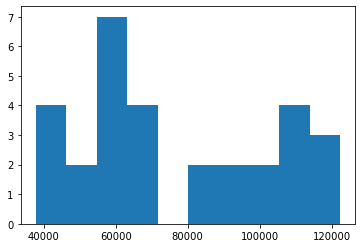

In [10]:
## histogram on original data
plt.hist(salary["Salary"])

(array([4., 1., 6., 4., 2., 1., 2., 3., 2., 5.]),
 array([194.24469105, 209.80464705, 225.36460305, 240.92455905,
        256.48451505, 272.04447105, 287.60442706, 303.16438306,
        318.72433906, 334.28429506, 349.84425106]),
 <BarContainer object of 10 artists>)

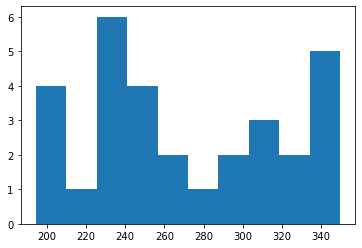

In [23]:
## after applying sqrt transformation 
sqrt_salary = np.sqrt(salary)

plt.hist(sqrt_salary["Salary"])

In [17]:
##create log transformation
log_salary=np.log(salary)

(array([3., 2., 0., 7., 5., 0., 2., 2., 3., 6.]),
 array([10.53823732, 10.6559112 , 10.77358508, 10.89125896, 11.00893284,
        11.12660672, 11.2442806 , 11.36195448, 11.47962836, 11.59730224,
        11.71497612]),
 <BarContainer object of 10 artists>)

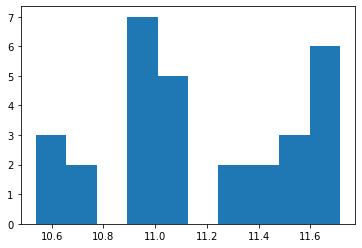

In [24]:
## after applying log transformation
plt.hist(log_salary["Salary"])

## the best histogram is getting after applying sqrt transformation

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd14a240670>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd14a240c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd14a2403a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd14a2580a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd14a258370>],
 'means': []}

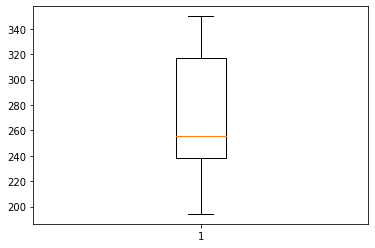

In [27]:
plt.boxplot(sqrt_salary["Salary"])

In [28]:
sqrt_salary.duplicated().sum()

0

In [29]:
sqrt_salary.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [30]:
y = sqrt_salary['Salary']
x1 = sqrt_salary['YearsExperience']

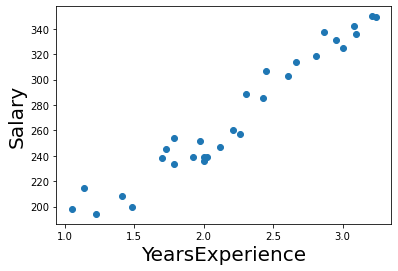

In [31]:
plt.scatter(x1,y)
plt.xlabel('YearsExperience',fontsize= 20)
plt.ylabel('Salary',fontsize = 20)
plt.show()

In [32]:
sqrt_salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.970541
Salary,0.970541,1.000000


In [33]:
import statsmodels.formula.api as smf

In [38]:
model = smf.ols("Salary~YearsExperience",data = sqrt_salary).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           7.58e-19
Time:                        21:48:53   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         103.5680      8.178     12.663      0.000      86.815     120.321
YearsExperience    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

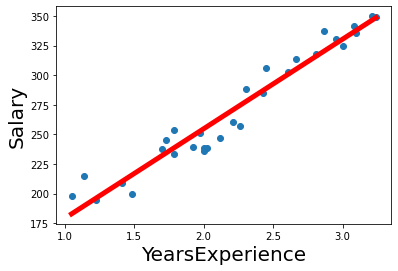

In [39]:
plt.scatter(x1,y)
yhat = 75.6269*x1+103.5680
fig = plt.plot(x1,yhat,lw=5,color='red',label = 'regression')
plt.xlabel('YearsExperience',fontsize=20)
plt.ylabel('Salary',fontsize=20)
plt.show()